In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Dropout , Dense , InputLayer , Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Loading data

In [ ]:
df = pd.read_csv("liver_cirrhosis.csv")
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [ ]:
# check for Null values
df.isna().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


# Values to replace

In [ ]:
# We need to replace object values to numerical
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [ ]:
# List to store column names with dtype 'object'
object_columns = []

# Loop through the columns to check their data type
for column in df.columns:
    if df[column].dtype == 'object':
        object_columns.append(column)

object_columns.append("Stage")
object_columns

['Status',
 'Drug',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Stage']

In [ ]:
def change_values(columns , dataframe):

    for column in columns:
        unique_values = dataframe[column].unique()
        dic = {d: k for k, d in enumerate(unique_values)}
        print(column)
        print(dic)
        dataframe[column] = dataframe[column].replace(dic)

change_values(columns = object_columns , dataframe = df)

Status
{'C': 0, 'D': 1, 'CL': 2}
Drug
{'Placebo': 0, 'D-penicillamine': 1}
Sex
{'F': 0, 'M': 1}
Ascites
{'N': 0, 'Y': 1}
Hepatomegaly
{'Y': 0, 'N': 1}
Spiders
{'N': 0, 'Y': 1}
Edema
{'N': 0, 'Y': 1, 'S': 2}
Stage
{1: 0, 2: 1, 3: 2}


# Checking imbalance of data

#### Checking for data imbalance because the model may favor the majority class, ignoring minority classes and leading to biased results.

In [ ]:
label = [i for i in df['Stage'].unique()]
values = [i for i in df['Stage'].value_counts()]
explode = (0.1, 0.1, 0.1)

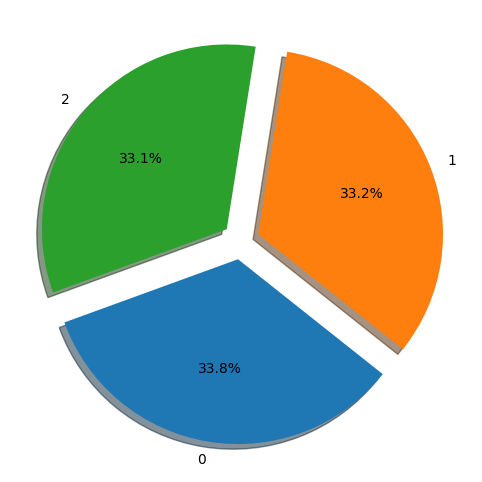

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(x = values,  labels=label, autopct='%1.1f%%' ,explode= explode,shadow=True, startangle=200  )
plt.show()

# Compute pairwise correlation of column

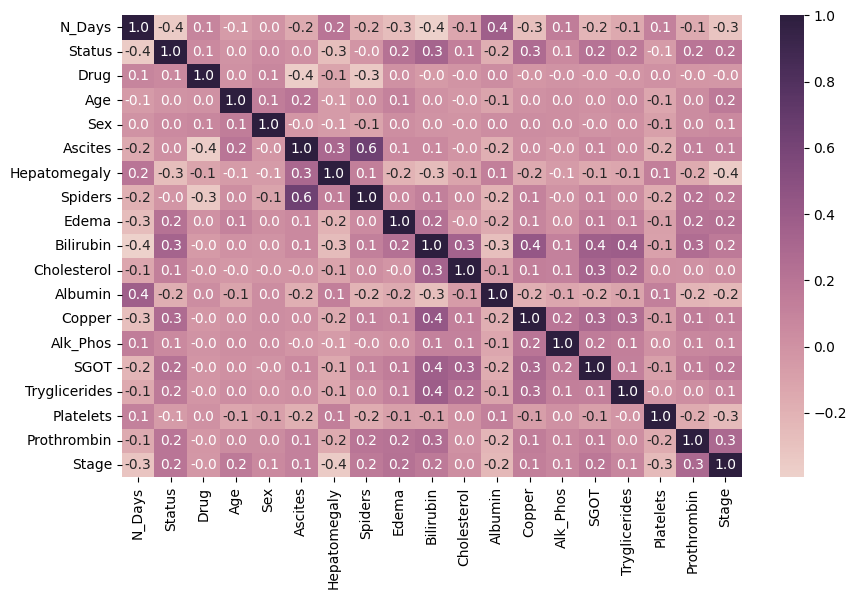

In [ ]:
plt.figure(figsize=(10 ,6))
sns.heatmap(df.corr()  , annot=True ,cmap=sns.cubehelix_palette(as_cmap=True) , fmt=".1f")
plt.show()

In [ ]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,0,18499,0,0,0,0,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,0
1,1230,0,0,19724,1,1,1,1,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,1
2,4184,0,0,11839,0,0,1,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,1
3,2090,1,0,16467,0,0,1,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,1
4,2105,1,0,21699,0,0,0,0,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,1,1,23612,0,0,1,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,1
24996,3584,1,1,23612,0,0,1,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,1
24997,971,1,1,16736,0,0,0,1,1,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,2
24998,3707,0,1,16990,0,0,0,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,1


# Making train/test datasets

In [ ]:
y = df["Stage"]
X = df.drop(columns="Stage")

In [ ]:
y

,Stage
0,0
1,1
2,1
3,1
4,0
...,...
24995,1
24996,1
24997,2
24998,1


In [ ]:
X

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2221,0,0,18499,0,0,0,0,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9
1,1230,0,0,19724,1,1,1,1,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8
2,4184,0,0,11839,0,0,1,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0
3,2090,1,0,16467,0,0,1,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2
4,2105,1,0,21699,0,0,0,0,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,1,1,23612,0,0,1,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0
24996,3584,1,1,23612,0,0,1,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0
24997,971,1,1,16736,0,0,0,1,1,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0
24998,3707,0,1,16990,0,0,0,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9


In [ ]:
# spliting data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=411 , shuffle=True)

In [ ]:
# Checking shapes
X_train.shape ,X_test.shape , y_train.shape, y_test.shape

((20000, 18), (5000, 18), (20000,), (5000,))

In [ ]:
# Normalzing our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.22429054,  0.71496867, -0.75897571, ..., -0.0313433 ,
        -1.35726351,  1.42958227],
       [ 1.63546264, -0.84473611,  1.31756522, ..., -1.25084025,
         0.53908041, -1.15896619],
       [ 1.54563706,  0.71496867,  1.31756522, ...,  0.02014477,
         1.58359069,  0.416672  ],
       ...,
       [-0.22795986, -0.84473611, -0.75897571, ...,  0.02014477,
        -0.13021745, -1.15896619],
       [ 0.20008653, -0.84473611,  1.31756522, ...,  0.19731238,
        -0.75895179, -0.70878385],
       [-0.1812139 ,  0.71496867,  1.31756522, ..., -0.37432682,
        -1.20515036, -0.14605592]])

In [ ]:
y_train

,Stage
13086,2
1651,1
2624,1
11758,1
6516,0
...,...
268,2
18765,0
20402,0
4716,1


#### to_categorical converts integer class labels (e.g., 0, 1, 2) into one-hot encoded vectors.

In [ ]:
y_train = to_categorical(y_train , num_classes=3)
#y_test = to_categorical(y_test , num_classes=3)

In [ ]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Input shape for model
shape = (X_train.shape[1] , )
shape

(18,)

In [ ]:
num_classes = len(np.unique(y_train))
print(num_classes)

2


## Creating a model

In [ ]:
def build_model():

    model = Sequential()

    model.add(InputLayer(shape=shape))
    model.add(Dense(256 , activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(128 , activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(64 , activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(32 , activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(3 , activation="softmax"))

    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,195 (188.26 KB)

 Trainable params: 48,195 (188.26 KB)

 Non-trainable params: 0 (0.00 B)

We chose CategoricalCrossentropy as the loss function because it's commonly used for multi-class classification tasks, where the model predicts probabilities for each class. Accuracy is used as a metric to measure the percentage of correct predictions, which is a straightforward and commonly used metric to evaluate model performance in classification tasks.
We chose the Adam optimizer with a learning rate of 0.0001 because it combines the advantages of two other popular optimizers, AdaGrad and RMSProp, adapting the learning rate for each parameter individually. Adam is efficient and well-suited for deep learning tasks, especially when the learning rate is small

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

## Creating custom checkpoint

In [ ]:
checkpoint_path = "model_weights.weights.h5"

In [ ]:
#model.load_weights(checkpoint_path)

In [ ]:
batch_size = 32
n_batches = len(X_train) / batch_size
n_batches = math.ceil(n_batches)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True ,
                                                 verbose=1,
                                                 save_freq = n_batches
                                                )

In [ ]:
history = model.fit(x = X_train,
                   y = y_train ,
                   batch_size=32,
                   epochs=500 ,
                   validation_split=0.2,
                   shuffle=True,
                   verbose = 1,
                   callbacks=[cp_callback]
                   )

Epoch 1/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4312 - loss: 1.0548 - val_accuracy: 0.6180 - val_loss: 0.8672
Epoch 2/500
124/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5780 - loss: 0.9068
Epoch 2: saving model to model_weights.weights.h5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5850 - loss: 0.8947 - val_accuracy: 0.6545 - val_loss: 0.7936
Epoch 3/500
233/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 0.8422
Epoch 3: saving model to model_weights.weights.h5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6183 - loss: 0.8372 - val_accuracy: 0.6850 - val_loss: 0.7368
Epoch 4/500
361/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - loss: 0.7910
Epoch 4: saving model to model_weights.weights.h5
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6543 - loss: 0.7887 - val_accuracy: 0.7032 - val_loss: 0.6962
Epoch 5/500
485/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6744 - loss: 0.7502
Epoch 5: saving model 

# Model evaluation

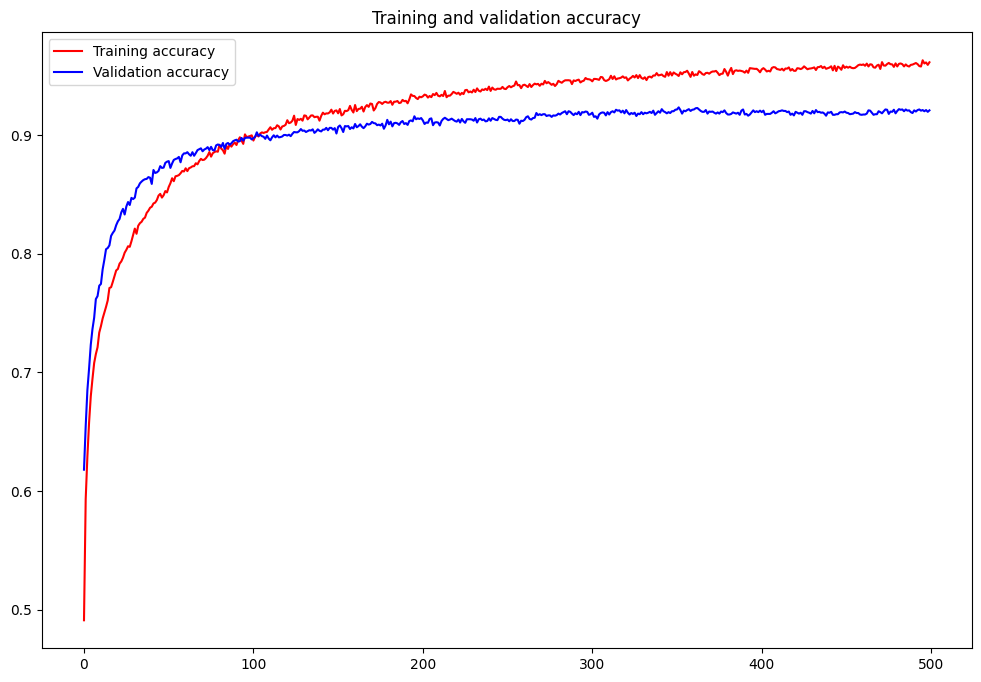

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))


plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

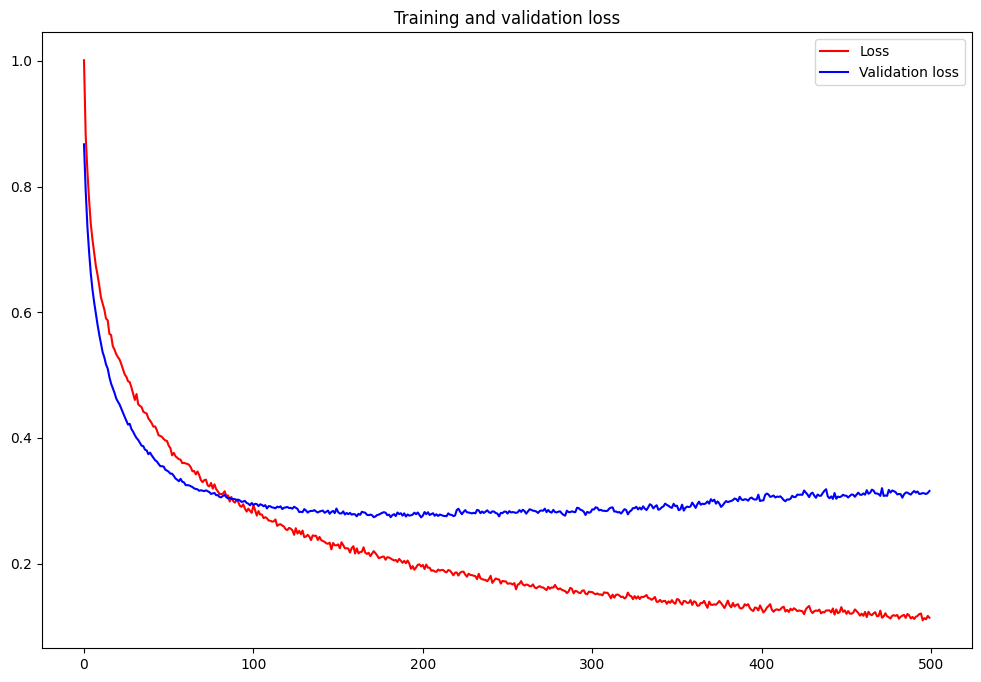

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r', label='Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Making predictions

In [ ]:
def plot_classification(y_pred, y_true, model_name):
    num_matches = np.sum(y_pred == y_true)
    accuracy = num_matches / len(y_true)


    plt.figure(figsize=(20, 5))
    plt.scatter(range(len(y_pred)), y_pred, marker='o', c=y_true)
    plt.xlabel('Test Samples')
    plt.ylabel('Predicted Classes')
    plt.title('Classification via '+model_name)
    plt.show()

    print("Prediction accuracy: ", int(100 * accuracy) / 100)

In [ ]:
x_pred = model.predict(X_test)
pred = np.argmax(x_pred , axis=1)
pred

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([2, 2, 1, ..., 0, 2, 1])

In [ ]:
y_test

,Stage
15858,1
6569,2
7669,1
9335,2
8607,0
...,...
21934,2
20497,1
22637,0
19483,2


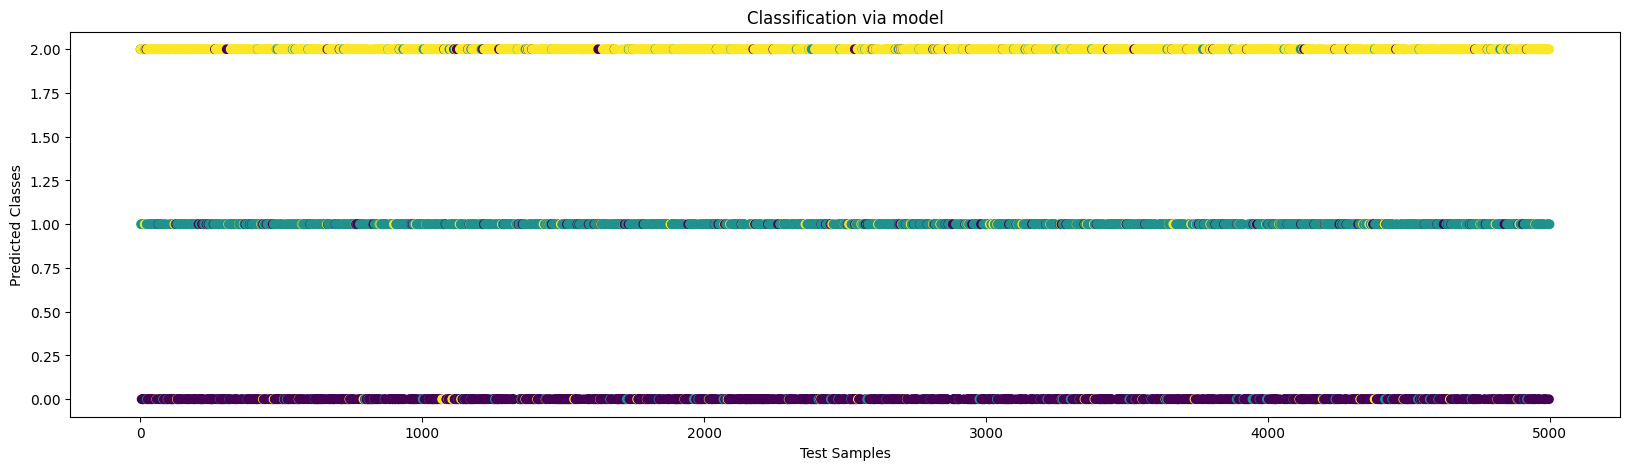

Prediction accuracy:  0.91


In [ ]:
plot_classification(pred , y_test , "model")

The model achieved a prediction accuracy of 91%. This indicates that the model correctly classified approximately 91% of the test samples.

The scatter plot provides a visualization of the model's predictions across all test samples. The marker colors represent the true labels, allowing for an assessment of how closely the predictions match the actual classes.

# Confusion Matrix


In [ ]:
def confusion_matrix(y_pred , y_true):
    cm = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)

    # Plot the confusion matrix as a heatmap.
    plt.figure(figsize=[12, 6])


    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()

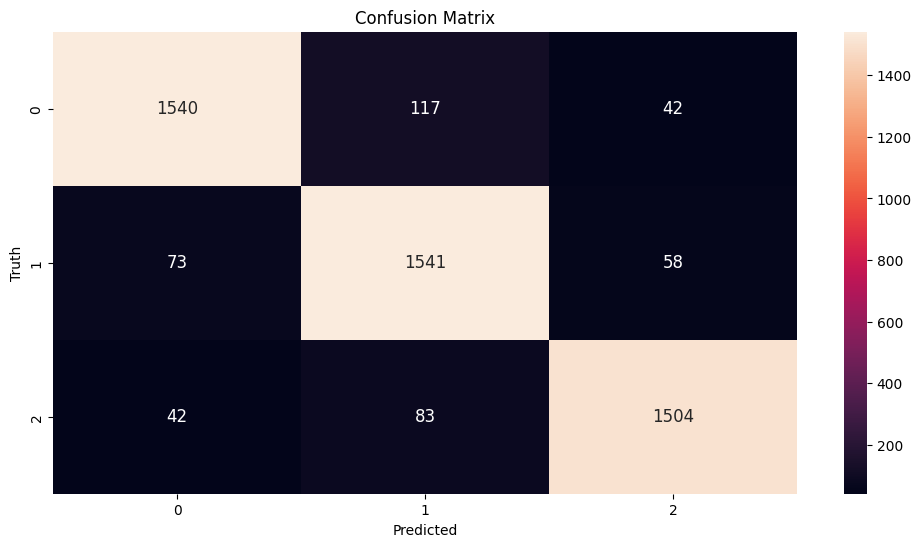

In [ ]:
confusion_matrix(pred ,y_test)

The confusion matrix gives a detailed breakdown of the model's performance across all classes. It illustrates:

True Positives (correct classifications per class, on the diagonal).
False Positives and False Negatives (off-diagonal values), highlighting specific misclassification patterns.